# ABBA BABA test
## Loading modules

In [1]:
import gcsfs #module for google cloud connection
import os
import allel
import zarr
import pandas as pd
import numpy as np
from matplotlib import pyplot

------

### Connect to google cloud ag1000g data 

In [2]:
gcs_orig = gcsfs.GCSFileSystem(project='malariagen-jupyterhub', token='cache')
gcs =  gcsfs.GCSFileSystem(project='malariagen-jupyterhub', token=gcs_orig.session.credentials)

In [3]:
phase2path = os.path.join("ag1000g-release", "phase2.AR1", "variation", "main", "zarr", "biallelic", "ag1000g.phase2.ar1.pass.biallelic")

In [4]:
gcsmap = gcsfs.mapping.GCSMap(phase2path, gcs=gcs)

----------------------------

Load Ag1000G data into python (metadata using pandas and genome using zarr and then scikit-allel)

In [5]:
metadata = pd.read_csv("samples.meta.txt", sep="\t")
metadata.head()

,ox_code,src_code,population,country,location,site,contributor,contact,year,m_s,sex,n_sequences,mean_coverage,ebi_sample_acc,latitude,longitude
0,AA0040-C,Twifo_Praso__E2,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,95033368,30.99,ERS311878,5.60858,-1.54926
1,AA0041-C,Twifo_Praso__H3,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,95843804,31.70,ERS311886,5.60858,-1.54926
2,AA0042-C,Takoradi_C7,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,107420666,35.65,ERS311894,4.91217,-1.77397
3,AA0043-C,Takoradi_H8,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,95993752,29.46,ERS311902,4.91217,-1.77397
4,AA0044-C,Takoradi_D10,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,103044262,33.67,ERS311910,4.91217,-1.77397


Taking 4 populations for the ABBA BABA test and subset

In [6]:
pop_select = metadata.population.isin({'BFcol', 'GHcol', 'BFgam', 'AOcol'}).values
pop_select

array([ True,  True,  True, ..., False, False, False])

In [7]:
pop_subset = metadata[pop_select]
pop_subset.head()

,ox_code,src_code,population,country,location,site,contributor,contact,year,m_s,sex,n_sequences,mean_coverage,ebi_sample_acc,latitude,longitude
0,AA0040-C,Twifo_Praso__E2,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,95033368,30.99,ERS311878,5.60858,-1.54926
1,AA0041-C,Twifo_Praso__H3,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,95843804,31.70,ERS311886,5.60858,-1.54926
2,AA0042-C,Takoradi_C7,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,107420666,35.65,ERS311894,4.91217,-1.77397
3,AA0043-C,Takoradi_H8,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,95993752,29.46,ERS311902,4.91217,-1.77397
4,AA0044-C,Takoradi_D10,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,103044262,33.67,ERS311910,4.91217,-1.77397


In [8]:
calldata= zarr.Group(gcsmap, read_only=True)

In [9]:
g = calldata["3L"]["calldata/GT"]

In [10]:
variants = calldata["3L"]["variants"]

In [11]:
pos_all = allel.VariantChunkedTable(variants, names=['POS'], index = 'POS')
pos_all

,POS
0,9790
1,9791
2,9798
...,...
7897663,41956537
7897664,41956541
7897665,41956551


In [12]:
pos = variants['POS'][:]
pos

array([    9790,     9791,     9798, ..., 41956537, 41956541, 41956551],
      dtype=int32)

In [13]:
geno = allel.GenotypeChunkedArray(g)
geno

<GenotypeChunkedArray shape=(7897666, 1142, 2) dtype=int8 chunks=(524288, 61, 2)
   nbytes=16.8G cbytes=-1 cratio=-18038269144.0
   compression=blosc compression_opts={'cname': 'zstd', 'clevel': 1, 'shuffle': -1, 'blocksize': 0}
   values=zarr.core.Array>

Subset genotype to my 4 populations

In [14]:
geno_subset = geno.subset(sel1=pop_select)
geno_subset

<GenotypeChunkedArray shape=(7897666, 300, 2) dtype=int8 chunks=(7713, 300, 2)
   nbytes=4.4G cbytes=189.0M cratio=23.9
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [15]:
grp = pop_subset.groupby("population")

In [16]:
grp_indices = grp.indices
grp_indices

{'AOcol': array([222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234,
        235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
        248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
        261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
        274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
        287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]),
 'BFcol': array([ 56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
         72,  73,  74,  75,  76,  77,  78,  82,  83,  84,  94,  95,  96,
         97,  98, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 150, 155, 156, 158, 159, 160, 163, 164, 165, 166,
        167, 168, 169, 171, 175, 178, 181, 183, 184, 186, 187, 188, 189,
        190, 196, 197, 200, 201, 204, 205, 213, 216, 219]),
 'BFgam': array([ 55,  69,  70,  71,  79,  80,  81,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  99, 100, 10

In [17]:
ac_subpops = geno_subset.count_alleles_subpops(grp_indices)
ac_subpops

<AlleleCountsChunkedTable shape=(7897666,) dtype=[('AOcol', '<i4', (2,)), ('BFcol', '<i4', (2,)), ('BFgam', '<i4', (2,)), ('GHcol', '<i4', (2,))]
   nbytes=241.0M cbytes=24.3M cratio=9.9
   values=allel.chunked.storage_zarr.ZarrTable>

In [18]:
abba_3L = allel.patterson_d(ac_subpops['AOcol'], ac_subpops['BFcol'], ac_subpops['BFgam'], ac_subpops['GHcol'])
abba_3L

(array([ 0.,  0.,  0., ...,  0., -0.,  0.]),
 array([0., 0., 0., ..., 0., 0., 0.]))

In [19]:
len(abba_3L[0])

7897666

In [20]:
min(abba_3L[0])

-0.6061429512516469

In [21]:
max(abba_3L[0])

0.8047658862876255

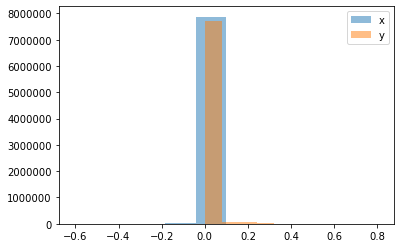

In [22]:
x = abba_3L[0]
y = abba_3L[1]
pyplot.hist(x, alpha=0.5, label='x')
pyplot.hist(y, alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.show()

In [25]:
d_stat_all = abba_3L[0] / abba_3L[1]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [38]:
bool_notna = ~np.isnan(d_stat_all)

In [39]:
dstat_plot = np.compress(bool_notna, d_stat_all)
pos_plot = np.compress(bool_notna, pos)

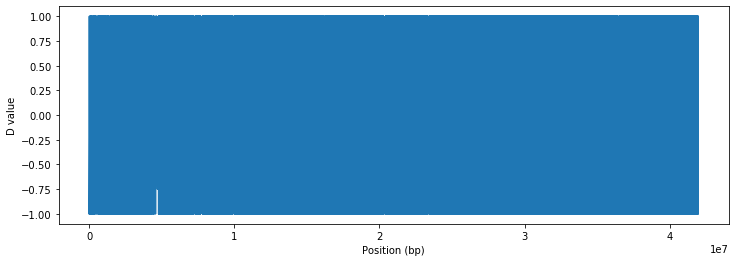

In [40]:
fig, ax = pyplot.subplots(figsize=(12, 4))
ax.plot(pos_plot, dstat_plot)
ax.set_xlabel('Position (bp)')
ax.set_ylabel('D value');

(array([283325.,  34780.,  58770.,  90227., 206793., 208803., 139702.,
         86703.,  73234., 392773.]),
 array([-1.00000000e+00, -8.00000000e-01, -6.00000000e-01, -4.00000000e-01,
        -2.00000000e-01, -7.32747196e-15,  2.00000000e-01,  4.00000000e-01,
         6.00000000e-01,  8.00000000e-01,  1.00000000e+00]),
 <a list of 10 Patch objects>)

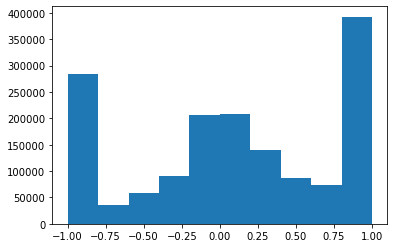

In [42]:
pyplot.hist(dstat_plot)

In [ ]:
allel.windowed_patterson_fst

In [33]:
pos_plot.shape

(6322556,)

In [34]:
dstat_plot.shape

(6322556,)

In [ ]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(pos_plot, abba3_L, t, s2)
axs[0].set_xlim(0, pos.max())
axs[0].set_xlabel('Position (bp)')
axs[0].set_ylabel('D value')
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('coherence')

fig.tight_layout()
plt.show()